# 载入数据

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] =False
%matplotlib inline 

In [2]:
import os
#PATH="../input/home-credit-default-risk"
PATH="E:\ipython\kaggle\Kaggle_Home_Credit_Default_Risk\input"
print(os.listdir(PATH))

['.gitkeep', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
application_train = pd.read_csv(PATH+"/application_train.csv")
application_test = pd.read_csv(PATH+"/application_test.csv")
bureau = pd.read_csv(PATH+"/bureau.csv")
bureau_balance = pd.read_csv(PATH+"/bureau_balance.csv")
credit_card_balance = pd.read_csv(PATH+"/credit_card_balance.csv")
installments_payments = pd.read_csv(PATH+"/installments_payments.csv")
previous_application = pd.read_csv(PATH+"/previous_application.csv")
POS_CASH_balance = pd.read_csv(PATH+"/POS_CASH_balance.csv")

# 数据概况
行列数，预览前五行，列名

In [4]:
print("application_train -  rows:",application_train.shape[0]," columns:", application_train.shape[1])
print("application_test -  rows:",application_test.shape[0]," columns:", application_test.shape[1])
print("bureau -  rows:",bureau.shape[0]," columns:", bureau.shape[1])
print("bureau_balance -  rows:",bureau_balance.shape[0]," columns:", bureau_balance.shape[1])
print("credit_card_balance -  rows:",credit_card_balance.shape[0]," columns:", credit_card_balance.shape[1])
print("installments_payments -  rows:",installments_payments.shape[0]," columns:", installments_payments.shape[1])
print("previous_application -  rows:",previous_application.shape[0]," columns:", previous_application.shape[1])
print("POS_CASH_balance -  rows:",POS_CASH_balance.shape[0]," columns:", POS_CASH_balance.shape[1])

application_train -  rows: 307511  columns: 122
application_test -  rows: 48744  columns: 121
bureau -  rows: 1716428  columns: 17
bureau_balance -  rows: 27299925  columns: 3
credit_card_balance -  rows: 3840312  columns: 23
installments_payments -  rows: 13605401  columns: 8
previous_application -  rows: 1670214  columns: 37
POS_CASH_balance -  rows: 10001358  columns: 8


### application_train

In [5]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
      

## 查看缺失值情况

In [55]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)#统计每个字段缺失的个数并按降序排列
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)#缺失比例：每个字段缺失个数除以总长度
    mis_val_table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])#横向拼接
    # Print some summary information
    print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
        "There are " + str(len(mis_val_table.loc[mis_val_table['Total']!=0])) +
          " columns that have missing values.")
    return mis_val_table

### application_train

In [62]:
missing_data(application_train)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


## 查看样本不平衡情况

**TARGET** value 0 means loan is repayed, value 1 means loan is not repayed.

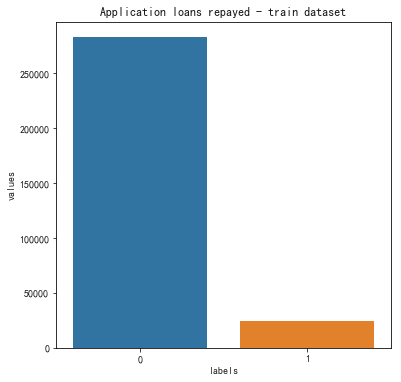

In [9]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


# 3.探索性分析EDA  初步了解数据
看每个变量的分布及其与坏账率的关系

1.分类型变量分布图与坏账率

In [5]:
def plot_stats(feature,dataset,label_rotation=False,horizontal_layout=True):
    #计算每个类别的数量
    temp = dataset[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})
    # 计算每个类别中标签=1数量比例
    cat_perc = dataset[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):#用来空值X轴标签值旋转
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.pointplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)#各类别坏账率折线图
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
        
    #添加数值标签
    x=list(range(len(cat_perc[feature])))
    p=cat_perc['TARGET']
    for a,b in zip(x,p):
        ax2.text(a, b+0.001, '%.3f' % b,ha='center', va= 'bottom',fontsize=10)
    for a,b in zip(x,temp):
        ax1.text(a, b+0.003,'%d' % b, ha='center', va= 'bottom',fontsize=10)
        
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

### 2.连续型变量分布图

In [6]:
# Plot distribution of one feature
def plot_distribution(feature,dataset,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(dataset[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   

### 3.在target=1/0时，连续型变量的分布

In [7]:
# 在target=1/0时，变量的分布
def plot_distribution_comp(var,dataset,nrow=2):
    
    i = 0
    t1 = dataset.loc[dataset['TARGET'] != 0]
    t0 = dataset.loc[dataset['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

### 3.去除异常值之后连续型变量的概率分布图

In [8]:
# Source: https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting (see references)

def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def plot_o_distribution(feature,dataset,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    x = dataset[feature].dropna()
    filtered = x[~is_outlier(x)]
    sns.distplot(filtered,color=color, kde=True,bins=100)
    plt.show() 



## 3.1 application 

1.申请表的ID从100001——456255 共356255条申请记录

## application_train

In [9]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [52]:
application_train.describe()['ELEVATORS_MODE']

count    143620.000000
mean          0.074490
std           0.132256
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120800
max           1.000000
Name: ELEVATORS_MODE, dtype: float64

In [11]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [12]:
len(application_train['SK_ID_CURR'].unique())

307511

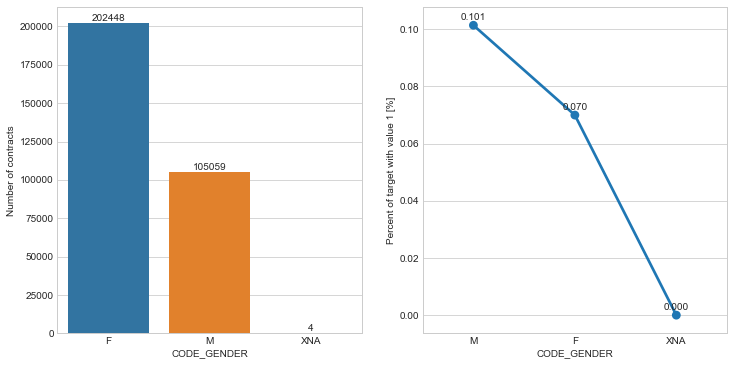

In [63]:
plot_stats('CODE_GENDER',application_train)

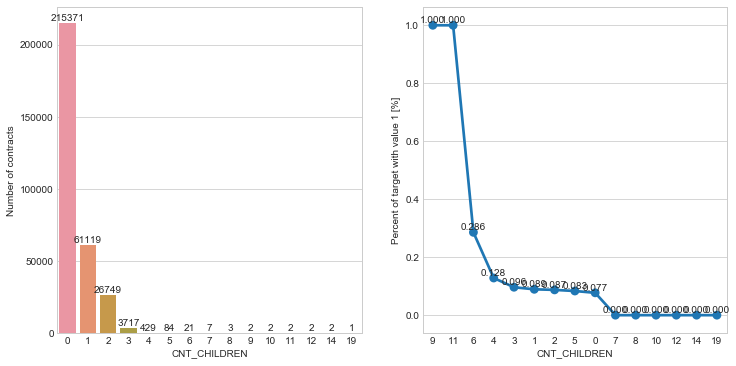

In [65]:
plot_stats('CNT_CHILDREN',application_train)

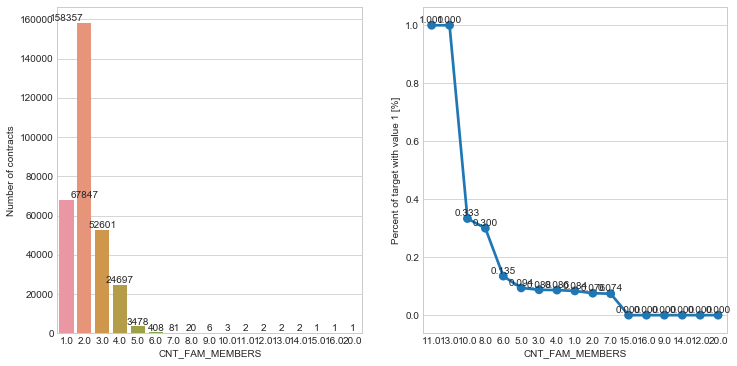

In [67]:
plot_stats('CNT_FAM_MEMBERS',application_train)

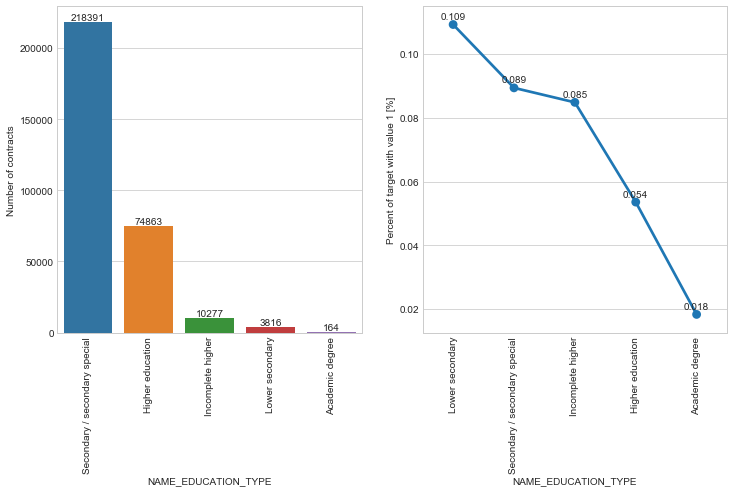

In [69]:
plot_stats('NAME_EDUCATION_TYPE',application_train,True,True)

学历越高，违约率越低

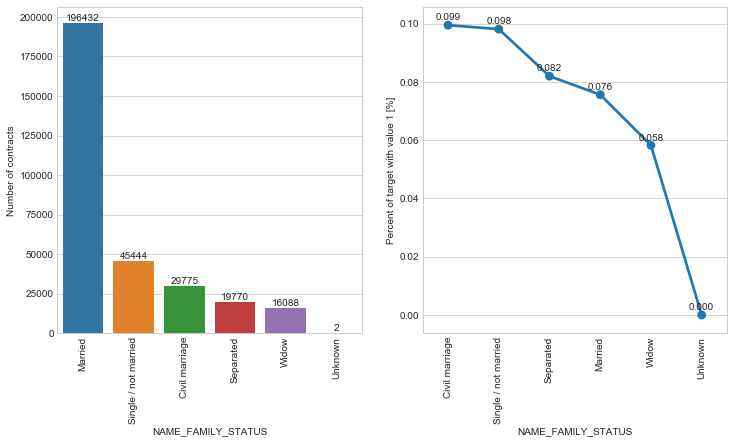

In [70]:
plot_stats('NAME_FAMILY_STATUS',application_train,True,True)

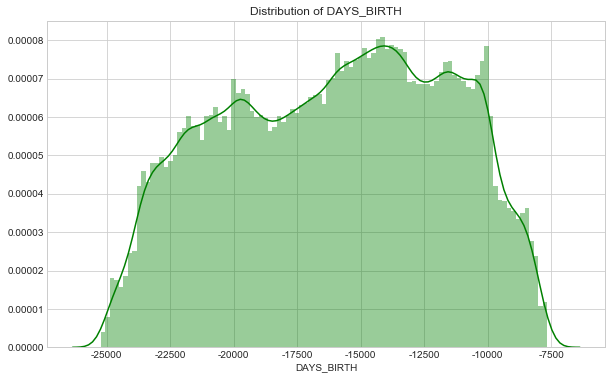

In [72]:
plot_distribution('DAYS_BIRTH',application_train,'green')

In [80]:
application_train.groupby('NAME_INCOME_TYPE').count()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
NAME_INCOME_TYPE,,,,,,,,,,,,,,,,,,,,,
Businessman,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,4,4,4,4,4,4
Commercial associate,71617,71617,71617,71617,71617,71617,71617,71617,71617,71614,...,71617,71617,71617,71617,61806,61806,61806,61806,61806,61806
Maternity leave,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,1,1,1,1,1,1
Pensioner,55362,55362,55362,55362,55362,55362,55362,55362,55362,55362,...,55362,55362,55362,55362,47715,47715,47715,47715,47715,47715
State servant,21703,21703,21703,21703,21703,21703,21703,21703,21703,21700,...,21703,21703,21703,21703,19499,19499,19499,19499,19499,19499
Student,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,15,15,15,15,15,15
Unemployed,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,5,5,5,5,5,5
Working,158774,158774,158774,158774,158774,158774,158774,158774,158774,158768,...,158774,158774,158774,158774,136947,136947,136947,136947,136947,136947


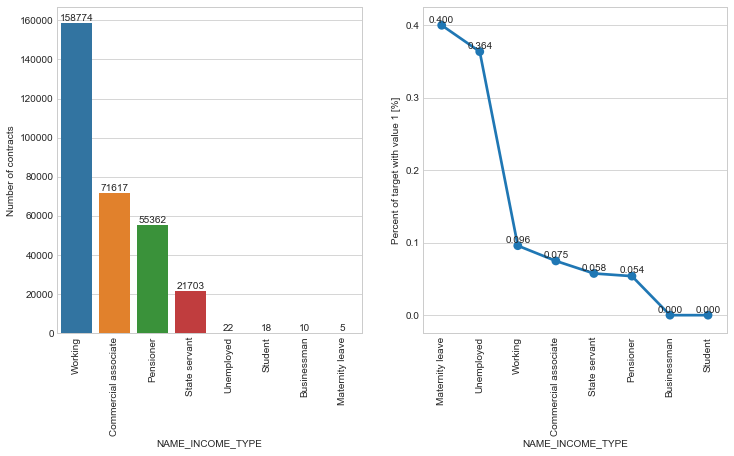

In [76]:
plot_stats('NAME_INCOME_TYPE',application_train,True,True)

##  application_test

In [13]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [14]:
application_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [15]:
len(application_test['SK_ID_CURR'].unique())

48744

## 3.2 bureau

In [16]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [17]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [18]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


####  SK_ID_CURR

In [19]:
len(bureau['SK_ID_CURR'].unique())

305811

application_train和test中共有307511+48744=356255条申请记录，但bureau表只包含了其中305811条

In [20]:
len(bureau['SK_ID_BUREAU'].unique())

1716428

In [22]:
application_bureau_train = application_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ", 
      application_bureau_train.shape[1]," columns.")

The resulting dataframe `application_bureau_train` has  1465325  rows and  138  columns.


#### CREDIT_ACTIVE 贷款状态

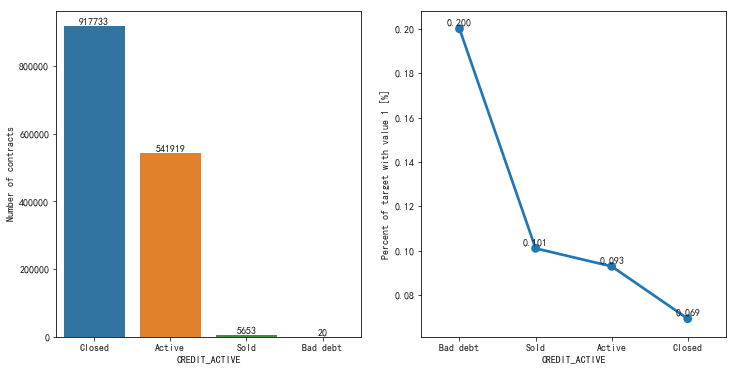

In [23]:
plot_stats('CREDIT_ACTIVE',application_bureau_train)

申请者在征信机构的历史贷款记录中，大多数是已还清的。在其他渠道有坏账记录的申请者，在HOMECREDIT的贷款坏账率达到了20%

#### CREDIT_CURRENCY 货币种类

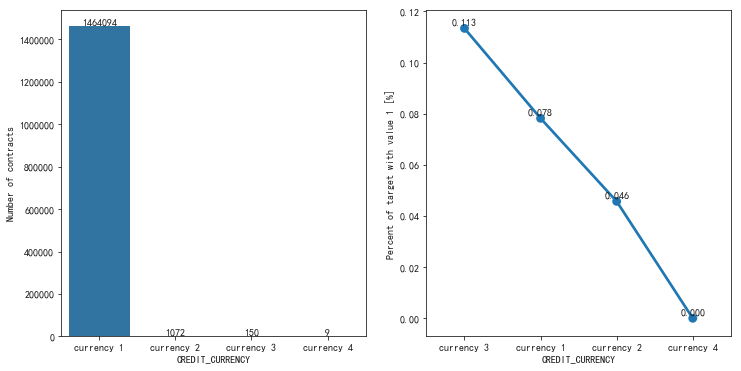

In [24]:
plot_stats('CREDIT_CURRENCY',application_bureau_train)

货币1占了绝大多数，货币3的坏账率最高

####  CREDIT_TYPE 贷款类型

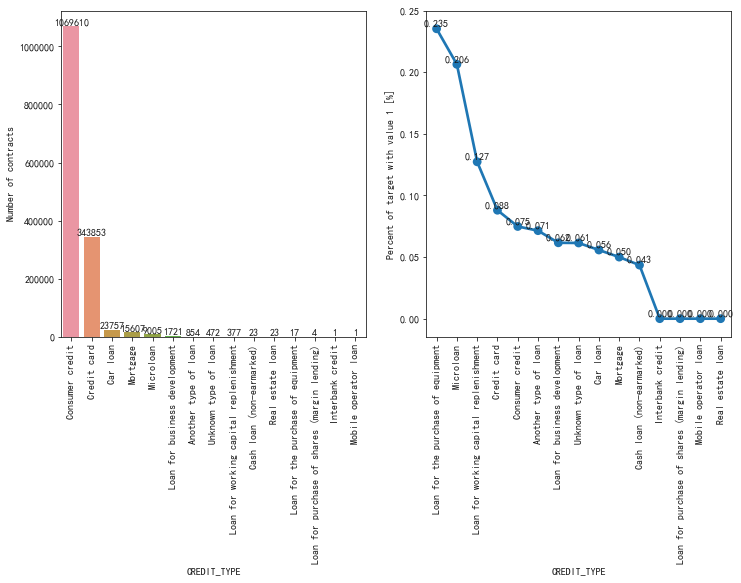

In [25]:
plot_stats('CREDIT_TYPE',application_bureau_train,True,True)

大多数历史贷款的类型是消费贷，信用卡，车贷
坏账率前三的贷款类型是：为购买设备贷款，微型贷款，流动资金补充贷款

#### DAYS_CREDIT 这笔历史贷款的申请日期距离对应的HC(homecredit)贷款申请日期的天数

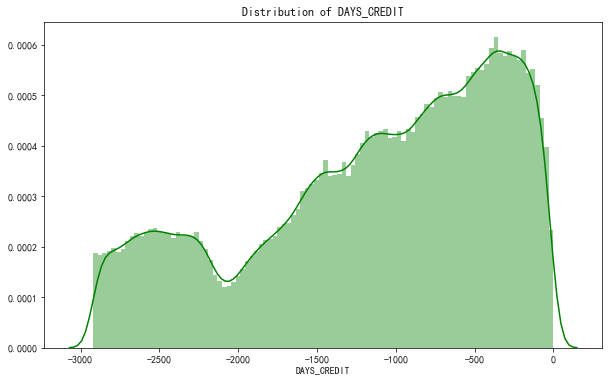

In [26]:
plot_distribution('DAYS_CREDIT',application_bureau_train,'green')

距离申请日期越近，记录数越多

#### CREDIT_DAY_OVERDUE 在向本公司申请时，对应的其他信用机构贷款的逾期天数

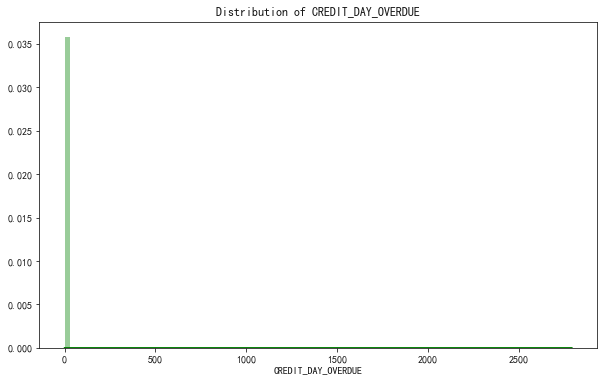

In [27]:
plot_distribution('CREDIT_DAY_OVERDUE',application_bureau_train,'green')

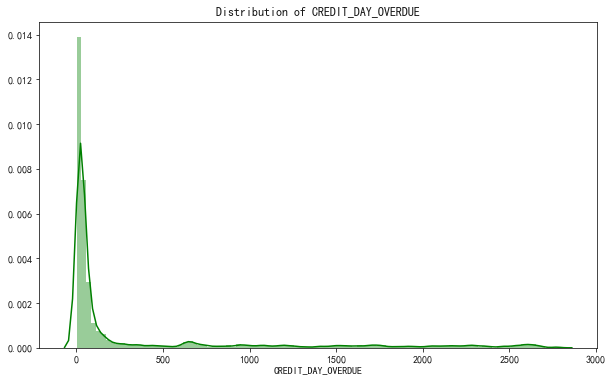

In [28]:
plot_distribution('CREDIT_DAY_OVERDUE',application_bureau_train.loc[application_bureau_train['CREDIT_DAY_OVERDUE']>0],'green')

历史贷款大多数的逾期天数为0，发生逾期的记录其逾期天数在0-200天左右

#### DAYS_CREDIT_ENDDATE 距离申请日期为止该笔历史贷款剩余还款天数

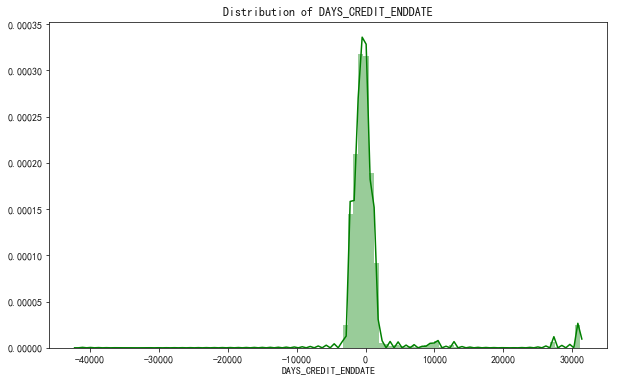

In [29]:
plot_distribution('DAYS_CREDIT_ENDDATE',application_bureau_train,'green')

#### DAYS_ENDDATE_FACT 距离申请日期，已还清贷款还清日至今的天数

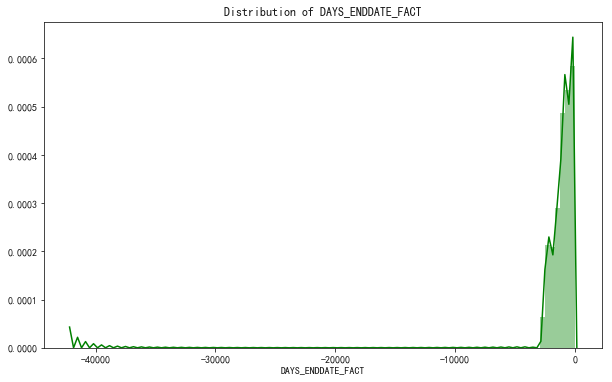

In [30]:
plot_distribution('DAYS_ENDDATE_FACT',application_bureau_train,'green')

#### AMT_CREDIT_MAX_OVERDUE 在向本公司申请时，最大逾期金额

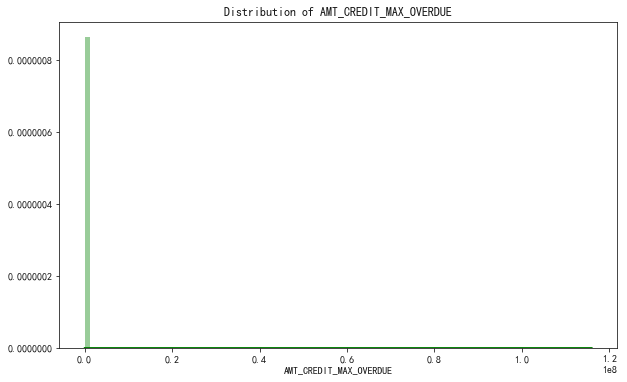

In [31]:
plot_distribution('AMT_CREDIT_MAX_OVERDUE',application_bureau_train,'green')

#### CNT_CREDIT_PROLONG 延期还款次数

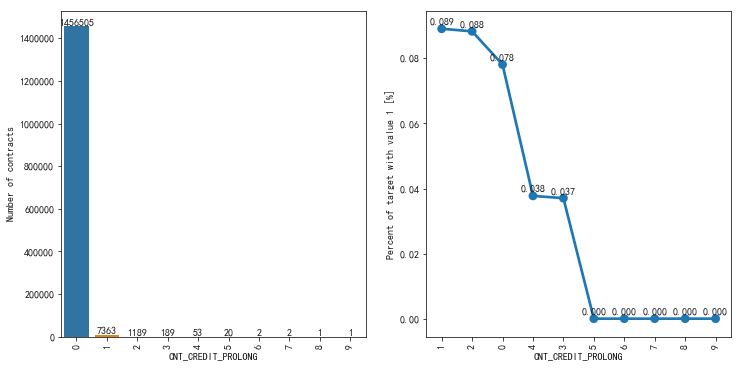

In [32]:
plot_stats('CNT_CREDIT_PROLONG',application_bureau_train,'green')

#### AMT_CREDIT_SUM 贷款额度

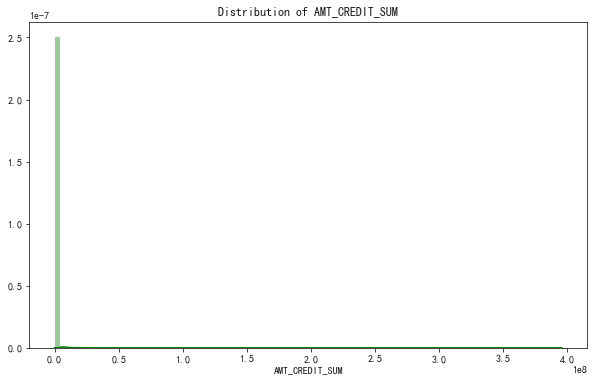

In [33]:
plot_distribution('AMT_CREDIT_SUM',application_bureau_train,'green')

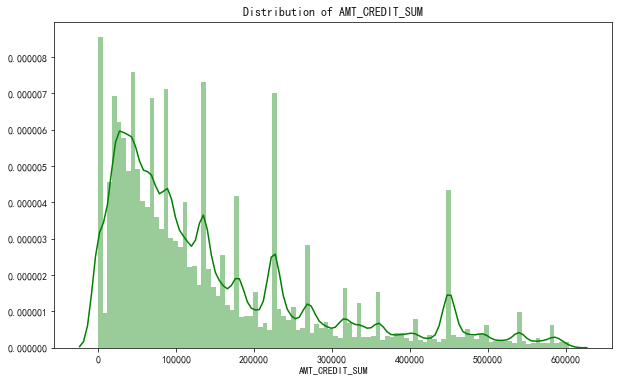

In [34]:
plot_o_distribution('AMT_CREDIT_SUM',application_bureau_train,'green')

大多数都是小额贷款

#### AMT_CREDIT_SUM_DEBT 贷款余额

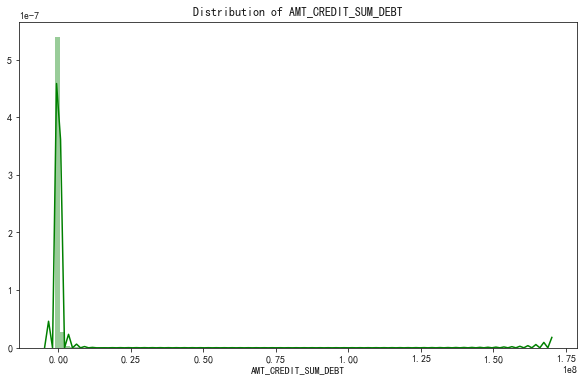

In [35]:
plot_distribution('AMT_CREDIT_SUM_DEBT',application_bureau_train,'green')

该字段为负数的都是信用卡业务，说明该张信用卡里有钱

#### AMT_CREDIT_SUM_LIMIT 信用卡当前额度

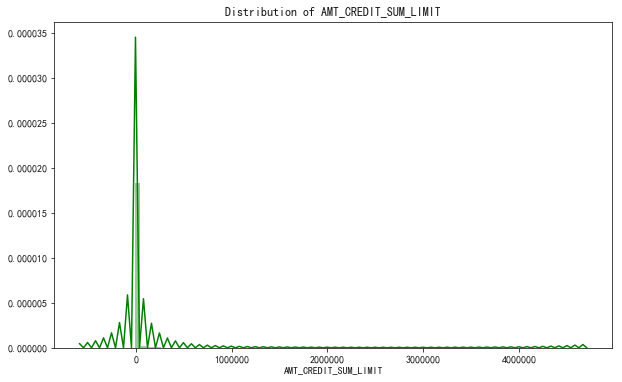

In [36]:
plot_distribution('AMT_CREDIT_SUM_LIMIT',application_bureau_train,'green')

#### AMT_CREDIT_SUM_OVERDUE 当前逾期金额

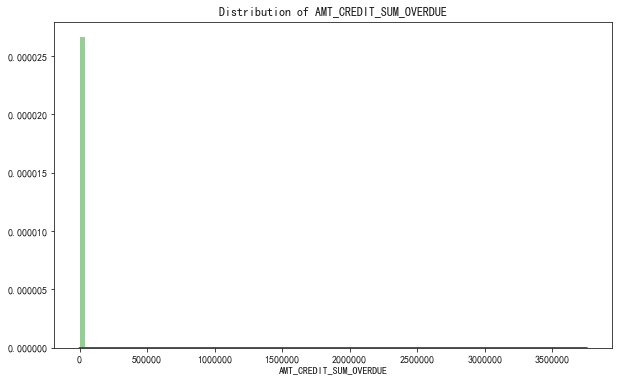

In [37]:
plot_distribution('AMT_CREDIT_SUM_OVERDUE',application_bureau_train,'green')

#### DAYS_CREDIT_UPDATE 关于这一笔贷款信息最新一次的更新时间至今的天数

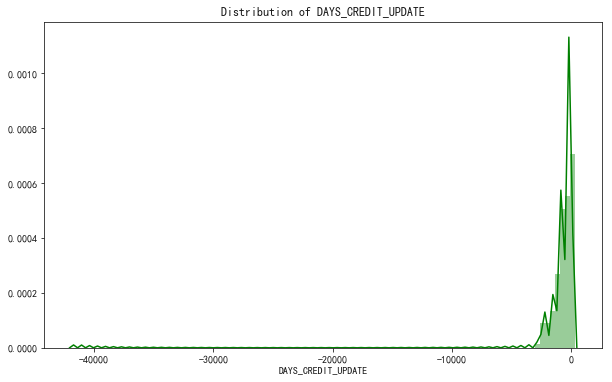

In [38]:
plot_distribution('DAYS_CREDIT_UPDATE',application_bureau_train,'green')

d:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
d:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


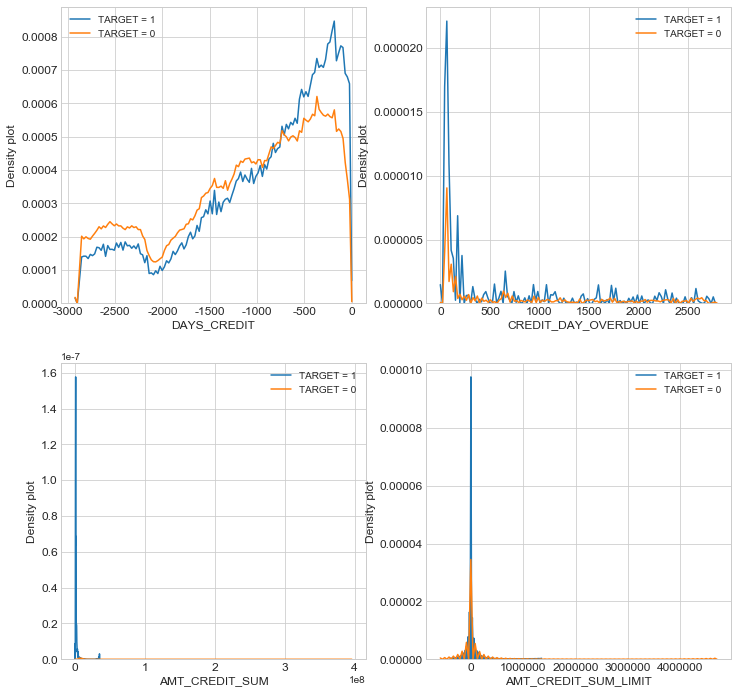

In [39]:
var = ['DAYS_CREDIT','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_LIMIT']

plot_distribution_comp(var,application_bureau_train, nrow=2)

## 3.3 bureau_balance

In [40]:
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [41]:
len(bureau_balance['SK_ID_BUREAU'].unique())

817395

In [42]:
len(bureau['SK_ID_BUREAU'].unique())

1716428

In [43]:
application_bureau_train_simple=application_bureau_train[['SK_ID_CURR','SK_ID_BUREAU','TARGET']]
len(application_bureau_train_simple)

1465325

In [44]:
    application_bureau_balance_train = application_bureau_train_simple.merge(bureau_balance, left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU', how='inner')
print("The resulting dataframe `application_bureau_balance_train` has ",application_bureau_balance_train.shape[0]," rows and ", 
      application_bureau_balance_train.shape[1]," columns.")

The resulting dataframe `application_bureau_balance_train` has  14701612  rows and  5  columns.


In [45]:
len(application_bureau_balance_train['SK_ID_BUREAU'].unique())

523515

In [46]:
len(application_bureau_balance_train['SK_ID_CURR'].unique())

92231

In [47]:
application_bureau_balance_train

,SK_ID_CURR,SK_ID_BUREAU,TARGET,MONTHS_BALANCE,STATUS
0,100002,6158904,1,-15,C
1,100002,6158904,1,-16,C
2,100002,6158904,1,-17,0
3,100002,6158904,1,-18,0
4,100002,6158904,1,-19,0
5,100002,6158904,1,-20,1
6,100002,6158904,1,-21,0
7,100002,6158904,1,-22,0
8,100002,6158904,1,-23,0
9,100002,6158904,1,-24,0


In [ ]:
bureau.loc[bureau['SK_ID_BUREAU']==5715480]

In [ ]:
bureau_and_balance=bureau.merge(bureau_balance, left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU', how='inner')

In [ ]:
bureau_and_balance.info()

In [ ]:
len(bureau_and_balance['SK_ID_BUREAU'].unique())

In [ ]:
bureau_and_balance.describe()

In [ ]:
bureau_and_balance

## 3.4 previous_application

In [58]:
previous_application[['NAME_CONTRACT_TYPE','NAME_PORTFOLIO','NAME_GOODS_CATEGORY','PRODUCT_COMBINATION','NAME_PRODUCT_TYPE','NAME_YIELD_GROUP']]

,NAME_CONTRACT_TYPE,NAME_PORTFOLIO,NAME_GOODS_CATEGORY,PRODUCT_COMBINATION,NAME_PRODUCT_TYPE,NAME_YIELD_GROUP
0,Consumer loans,POS,Mobile,POS mobile with interest,XNA,middle
1,Cash loans,Cash,XNA,Cash X-Sell: low,x-sell,low_action
2,Cash loans,Cash,XNA,Cash X-Sell: high,x-sell,high
3,Cash loans,Cash,XNA,Cash X-Sell: middle,x-sell,middle
4,Cash loans,Cash,XNA,Cash Street: high,walk-in,high
5,Cash loans,Cash,XNA,Cash X-Sell: low,x-sell,low_normal
6,Cash loans,XNA,XNA,Cash,XNA,XNA
7,Cash loans,XNA,XNA,Cash,XNA,XNA
8,Cash loans,XNA,XNA,Cash,XNA,XNA
9,Cash loans,XNA,XNA,Cash,XNA,XNA


In [48]:
application_previous_train = application_train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
print("The resulting dataframe `application_previous_train` has ",application_previous_train.shape[0]," rows and ", 
      application_previous_train.shape[1]," columns.")

The resulting dataframe `application_previous_train` has  1413701  rows and  158  columns.


In [50]:
len(application_previous_train['SK_ID_CURR'].unique())

291057

In [49]:
application_previous_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,...,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701702e+04,5.277186e+05,2.074985e-02,-1.632105e+04,6.870203e+04,...,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.452777e+05,...,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,-2.520100e+04,-1.791200e+04,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.682100e+04,2.385000e+05,1.003200e-02,-1.998000e+04,-2.828000e+03,...,0.715645,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.492550e+04,4.500000e+05,1.885000e-02,-1.604400e+04,-1.281000e+03,...,0.835095,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+05,8.079840e+05,3.454200e+04,6.795000e+05,2.866300e-02,-1.273900e+04,-2.840000e+02,...,0.852537,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,7.250800e-02,-7.489000e+03,3.652430e+05,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## 3.5 POS_CASH_balance

In [ ]:
POS_CASH_balance.loc[POS_CASH_balance['SK_ID_PREV']==2030495]

In [ ]:
POS_CASH_balance.loc[POS_CASH_balance['SK_ID_PREV']==2163253]

In [ ]:
POS_CASH_balance.loc[POS_CASH_balance['SK_ID_PREV']==2138466]

In [ ]:
POS_CASH_balance.loc[POS_CASH_balance['SK_ID_PREV']==2562793].sort_values(by='MONTHS_BALANCE')

In [ ]:
previous_application.loc[previous_application['SK_ID_PREV']==2562793]

In [ ]:
previous_application.loc[previous_application['SK_ID_PREV']==1290101]

In [ ]:
POS_CASH_balance.loc[POS_CASH_balance['SK_ID_PREV']==1290101].sort_values(by='MONTHS_BALANCE')

In [61]:
previous_application.loc[previous_application['SK_ID_PREV']==2676938]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
462242,2676938,323730,Cash loans,27300.51,382500.0,531495.0,NaN,382500.0,TUESDAY,12,...,XNA,36.0,middle,Cash X-Sell: middle,365243.0,-1610.0,-560.0,-770.0,-766.0,1.0


In [60]:
POS_CASH_balance.loc[POS_CASH_balance['SK_ID_PREV']==2676938].sort_values(by='MONTHS_BALANCE')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
9374245,2676938,323730,-54,36.0,36.0,Signed,0,0
6155410,2676938,323730,-53,36.0,35.0,Active,1,1
2781421,2676938,323730,-52,36.0,34.0,Active,2,2
705283,2676938,323730,-51,36.0,33.0,Active,2,2
7379607,2676938,323730,-50,36.0,32.0,Active,0,0
6224854,2676938,323730,-49,36.0,31.0,Active,0,0
5774947,2676938,323730,-48,36.0,30.0,Active,2,2
3983265,2676938,323730,-47,36.0,29.0,Active,0,0
2690866,2676938,323730,-46,36.0,28.0,Active,0,0
2749284,2676938,323730,-45,36.0,27.0,Active,0,0


# 数据预处理

## 数据集准备

In [ ]:



app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1

# target variable
Y = app_train['TARGET']
train_X = app_train.drop(['TARGET'], axis = 1)

# test ID
test_id = app_test['SK_ID_CURR']
test_X = app_test

# merge train and test datasets for preprocessing
data = pd.concat([train_X, test_X], axis=0)

## 分类型变量数值化与one-hot编码

In [ ]:
# 获取分类型变量
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# 分类型变量因子化
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# 分类型变量one-hot编码
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 



In [ ]:
# get categorical features
data_cats = _get_categorical_features(data)
prev_app_cats = _get_categorical_features(previous_application)
bureau_cats = _get_categorical_features(bureau)
pcb_cats = _get_categorical_features(pcb)
ccbal_cats = _get_categorical_features(credit_card_balance)

# create additional dummy features - 
previous_application = _get_dummies(previous_application, prev_app_cats)
bureau = _get_dummies(bureau, bureau_cats)
pcb = _get_dummies(pcb, pcb_cats)
credit_card_balance = _get_dummies(credit_card_balance, ccbal_cats)

# factorize the categorical features from train and test data
data = _factorize_categoricals(data, data_cats)

In [ ]:
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

## 使训练集和测试集有相同的列

In [ ]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

## 填补缺失值与归一化

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Imputer

#训练集的X和测试集X
train_X = app_train.drop('TARGET',axis=1)
features = list(train_X.columns)

test_X = app_test.copy()

In [ ]:
# 用中位数填补缺失，默认NaN为缺失值，也可用missing_values指定哪个inger型为缺失值
imputer = Imputer(strategy = 'median')
# Fit on the training data
imputer.fit(train_X)
train_X = imputer.transform(train_X)
test_X = imputer.transform(test_X)

In [ ]:
# 归一化
scaler = MinMaxScaler(feature_range = (0, 1))
# Repeat with the scaler
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [ ]:
print('Training data shape: ', train_X.shape)
print('Testing data shape: ', test_X.shape)

# Baseline

## 逻辑回归 

In [ ]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train_X, train_labels)
log_reg_pred = log_reg.predict_proba(test)[:, 1]#模型预测标签为1的概率

In [ ]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

In [ ]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

## 随机森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50)
# Train on the training data
random_forest.fit(train, train_labels)

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

## 展示变量重要性

In [ ]:
# Function to calculate and show feature importances
def show_feature_importances(model, features):
    plt.figure(figsize = (12, 8))
    # Dataframe of feature importances sorted from most to least
    results = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    results = results.sort_values('importance', ascending = False)
    
    # Display
    print(results.head(10))
    print('\nNumber of features with importance greater than 0.01 = ', np.sum(results['importance'] > 0.01))
    
    # Plot of feature importances as horizontal bar chart
    results.head(20).plot(x = 'feature', y = 'importance', kind = 'barh',
                     color = 'red', edgecolor = 'k', title = 'Feature Importances');
    return results

In [ ]:
# Show the feature importances for the default features
feature_importances = show_feature_importances(random_forest, features)

# LGBT模型

In [ ]:
from sklearn.model_selection import train_test_split 
import lightgbm as lgb

#### prepare final Train X and Test X dataframes 
ignore_features = ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]
trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]


x_train, x_val, y_train, y_val = train_test_split(trainX, Y, test_size=0.2, random_state=18)
lgb_train = lgb.Dataset(data=x_train, label=y_train)
lgb_eval = lgb.Dataset(data=x_val, label=y_val)

params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

lgb.plot_importance(model, figsize=(12, 25), max_num_features=100);
plt.show()

In [ ]:
preds = model.predict(testX)
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("lgb_baseline.csv", index=False)
sub_lgb.head()